In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x:'%.5f' % x)
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

# Loading data set

In [8]:
# Specify data type
types_dict_train = {'train_id':'int64', 'item_condition_id':'int8', 'price':'float64', 'shipping':'int8'}
types_dict_test = {'test_id':'int64', 'item_condition_id':'int8', 'shipping':'int8'}
# open train, test data file
train = pd.read_csv('train.tsv', delimiter='\t', low_memory=True, dtype=types_dict_train)
test = pd.read_csv('test.tsv', delimiter='\t', low_memory=True, dtype=types_dict_test)

In [9]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.00000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.00000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.00000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.00000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.00000,0,Complete with certificate of authenticity


In [10]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


# Check the size of training and test data size

The training dataset of sales items submitted by 1,482,535 users. and the test data has 693, 359 users. <br>since the test data does not contains the  "Price" column,  taining dataset has '8' columns and test dataset has '7' columns.

In [11]:
train.shape, test.shape

((1482535, 8), (302129, 7))

In [12]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)
 
 # Display basic statistics of training data
display_all(train.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
train_id,1482535.00000,NaN,NaN,NaN,741267.00000,427971.13500,0.00000,370633.50000,741267.00000,1111900.50000,1482534.00000
name,1482535,1225273,Bundle,2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_condition_id,1482535.00000,NaN,NaN,NaN,1.90738,0.90316,1.00000,1.00000,2.00000,3.00000,5.00000
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_name,849853,4809,PINK,54088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1482535.00000,NaN,NaN,NaN,26.73752,38.58607,0.00000,10.00000,17.00000,29.00000,2009.00000
shipping,1482535.00000,NaN,NaN,NaN,0.44727,0.49721,0.00000,0.00000,0.00000,1.00000,1.00000
item_description,1482531,1281426,No description yet,82489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


shipping – shipping flag. 
"1" means shipping fee paid by seller. "0" means shipping fee paid by buyer.

In [13]:
train['shipping'].value_counts() / len(train)

0   0.55273
1   0.44727
Name: shipping, dtype: float64

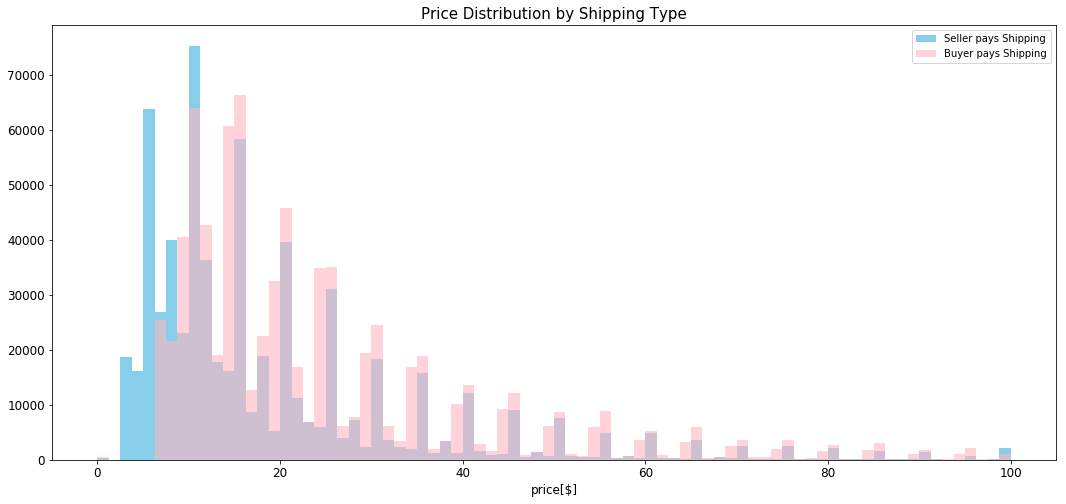

In [14]:
buyer = train.loc[train['shipping'] == 0, 'price']
seller = train.loc[train['shipping'] == 1, 'price']
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(seller, color='skyblue', alpha=1.0, bins=80, range = [0, 100],label='Seller pays Shipping')
ax.hist(buyer, color='lightpink', alpha=0.6, bins=80, range = [0, 100],label='Buyer pays Shipping')
plt.xlabel('price[$]', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [15]:
print('The average price is {}'.format(round(seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 22.57 if seller pays shipping
The average price is 30.11 if buyer pays shipping


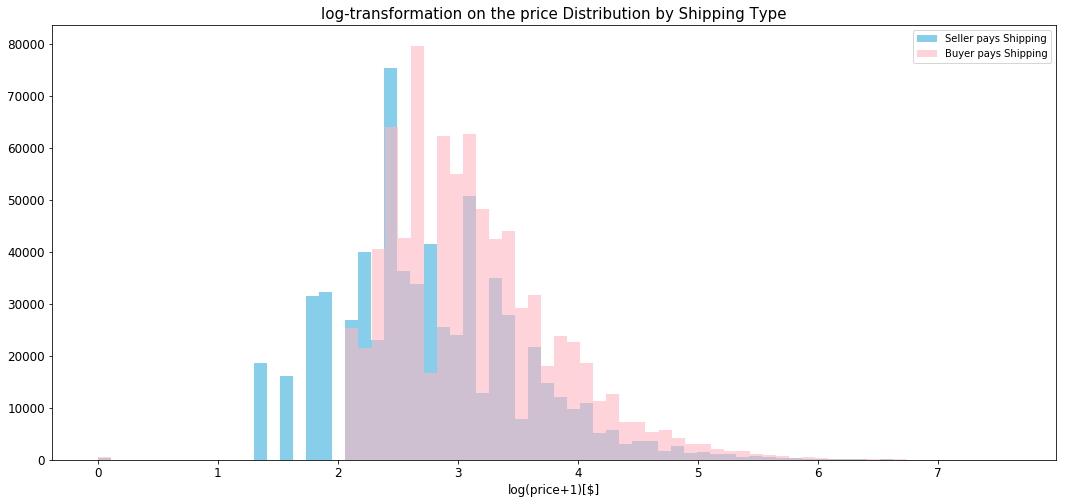

In [16]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(seller+1), color='skyblue', alpha=1.0, bins=70,label='Seller pays Shipping')
ax.hist(np.log(buyer+1), color='lightpink', alpha=0.6, bins=70,label='Buyer pays Shipping')
plt.xlabel('log(price+1)[$]', fontsize=12)
plt.title('log-transformation on the price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

## Convert training data category_name, item_description, name, and brand_name data type to "category"

In [17]:
train.category_name = train.category_name.astype('category')
train.item_description = train.item_description.astype('category')
train.name = train.name.astype('category')
train.brand_name = train.brand_name.astype('category')

test.category_name = test.category_name.astype('category')
test.item_description = test.item_description.astype('category')
test.name = test.name.astype('category')
test.brand_name = test.brand_name.astype('category')
 
train.dtypes, test.dtypes

(train_id                int64
 name                 category
 item_condition_id        int8
 category_name        category
 brand_name           category
 price                 float64
 shipping                 int8
 item_description     category
 dtype: object, test_id                 int64
 name                 category
 item_condition_id        int8
 category_name        category
 brand_name           category
 shipping                 int8
 item_description     category
 dtype: object)

## Confirm the unique value of the data.

In [18]:
train.apply(lambda x: x.nunique())
test.apply(lambda x: x.nunique())

test_id              302129
name                 272755
item_condition_id         5
category_name          1129
brand_name             3035
shipping                  2
item_description     269594
dtype: int64

# Check the number and percentage of missing data 

Category_name and brand_name have a large number of deficits. <br>it can be see that the brand_name loss is quite high.

In [19]:
train.isnull().sum(),train.isnull().sum()/train.shape[0]
test.isnull().sum(),test.isnull().sum()/test.shape[0]

(test_id                   0
 name                      0
 item_condition_id         0
 category_name          1317
 brand_name           128831
 shipping                  0
 item_description          0
 dtype: int64, test_id             0.00000
 name                0.00000
 item_condition_id   0.00000
 category_name       0.00436
 brand_name          0.42641
 shipping            0.00000
 item_description    0.00000
 dtype: float64)

In [20]:
# Change id column names of train and test
train = train.rename(columns = {'train_id':'id'})
test = test.rename(columns = {'test_id':'id'})

train['is_train'] = 1
test['is_train'] = 0

# Randomforest Regression

Let's preprocess the data to create a model of random forest.  _As the following step_

__1.Combine train and test data__

__2.Convert combinedData DataFrame title to "cateogry"__

__3.Vectorise words__

__4.Process "price" of training data with log(price) value__

__5.Separate by x and y (target) for random forest__

## 1. Combine training and test data into one dataframe

In [21]:
 # Connect training and test dataset, other than column'price'
train_test_combine = pd.concat([train.drop(['price'], axis=1),test],axis=0)

In [22]:
 train_test_combine.head()

,id,name,item_condition_id,category_name,brand_name,shipping,item_description,is_train
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,1,No description yet,1
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,1
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,1
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,1,New with tags. Leather horses. Retail for [rm]...,1
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,0,Complete with certificate of authenticity,1


## 2. Convert combinedData DataFrame title to "cateogry"

In [23]:
# Convert combinedData data category_name, item_description, name, and brand_name data type to "category"
train_test_combine.category_name = train_test_combine.category_name.astype('category')
train_test_combine.item_description = train_test_combine.item_description.astype('category')
train_test_combine.name = train_test_combine.name.astype('category')
train_test_combine.brand_name = train_test_combine.brand_name.astype('category')

## 3. Vectorise words

In [24]:
# Convert combinedData string to numeric value with ".cat.codes"
train_test_combine.name = train_test_combine.name.cat.codes
train_test_combine.category_name = train_test_combine.category_name.cat.codes
train_test_combine.brand_name = train_test_combine.brand_name.cat.codes
train_test_combine.item_description = train_test_combine.item_description.cat.codes

In [25]:
train_test_combine.head()
train_test_combine.dtypes

id                   int64
name                 int32
item_condition_id     int8
category_name        int16
brand_name           int16
shipping              int8
item_description     int32
is_train             int64
dtype: object

In [26]:
train_test_combine.head()

,id,name,item_condition_id,category_name,brand_name,shipping,item_description,is_train
0,0,761822,3,816,-1,1,966108,1
1,1,1074510,3,86,3722,0,1307017,1
2,2,108941,1,1263,4380,1,137936,1
3,3,667249,1,492,-1,1,937064,1
4,4,54063,1,1190,-1,0,438772,1


Since "is_train" (a flag indicating which it belongs to "train" or "test") is unnecessary, so drop it at this stage, and check the size of the train and test dataframe after dividing.

In [27]:
df_test = train_test_combine.loc[train_test_combine['is_train'] == 0]
df_train = train_test_combine.loc[train_test_combine['is_train'] == 1]

df_test = df_test.drop(['is_train'], axis=1)
df_train = df_train.drop(['is_train'], axis=1)

df_test.shape, df_train.shape

((302129, 7), (1482535, 7))

## 4. Process "price" of training data with log(price) value

Now that I have successfully converted from words to numbers, return the price of "train" to "df_train" and process it with the log function.<br> 
You can see that the category_name and name are converted to numbers completely.<br>
when converting the brand_name from string to numbers use 'cat.codes', <font color=red>the abnormal value is returned as "-1".</font>

In [28]:
df_train['price'] = train.price
 
# Process price with log function
df_train['price'] = df_train['price'].apply(lambda x: np.log(x) if x>0 else x)

df_train.head()

,id,name,item_condition_id,category_name,brand_name,shipping,item_description,price
0,0,761822,3,816,-1,1,966108,2.30259
1,1,1074510,3,86,3722,0,1307017,3.95124
2,2,108941,1,1263,4380,1,137936,2.30259
3,3,667249,1,492,-1,1,937064,3.55535
4,4,54063,1,1190,-1,0,438772,3.78419


## 5. Separate by x and y (target) for random forest

In [29]:
# Divide by all values except x = price, y = price (target)
x_train = df_train.drop(['price'], axis=1)
y_train = df_train.price
x_train.head()

,id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,761822,3,816,-1,1,966108
1,1,1074510,3,86,3722,0,1307017
2,2,108941,1,1263,4380,1,137936
3,3,667249,1,492,-1,1,937064
4,4,54063,1,1190,-1,0,438772


In [30]:
y_train.head()

0   2.30259
1   3.95124
2   2.30259
3   3.55535
4   3.78419
Name: price, dtype: float64

In [31]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## Random Forest Regression model 1

With hyper parameter: n_jobs=-1, min_samples_leaf=2, n_estimators=200

In [39]:
forest_1 = RandomForestRegressor(n_jobs=-1, min_samples_leaf=2, n_estimators=200)

In [40]:
import time
start = time.time()
forest_1.fit(x_train, y_train)
end = time.time()
print('  (took {:g} seconds)'.format(end-start))
forest_1.score(x_train, y_train)

  (took 182.875 seconds)


0.8738496535512629

## Random Forest Regression model 2

With hyper parameter: n_jobs=-1, min_samples_split =5,min_samples_leaf=1,bootstrap= True,n_estimators=500

In [ ]:
forest_2 = RandomForestRegressor(n_jobs=-1, min_samples_split =5,min_samples_leaf=1,bootstrap= True,n_estimators=500)

In [59]:
start = time.time()
forest_2.fit(x_train, y_train)
end = time.time()
print('  (took {:g} seconds)'.format(end-start))
forest_2.score(x_train, y_train)

  (took 452.833 seconds)


0.8908872423273063

## Random Forest Regression model 3

With hyper parameter: n_jobs=-1, min_samples_split =2,min_samples_leaf=1,bootstrap= True,n_estimators=600

In [61]:
forest_3 = RandomForestRegressor(n_jobs=-1, min_samples_split =2,min_samples_leaf=1,bootstrap= True,n_estimators=600)
start = time.time()
forest_3.fit(x_train, y_train)
end = time.time()
print('  (took {:g} seconds)'.format(end-start))
forest_3.score(x_train, y_train)

  (took 542.994 seconds)


0.930847566479646

## Choose Model 3 make final prediction 

In [62]:
preds = forest_3.predict(df_test)
# return to real value
preds = pd.Series(np.exp(preds))

In [63]:
num_rmsleL = rmsle(preds, y_train)
num_rmsleL

1.7410793464617802